In [6]:
#import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math
import pandas as pd

In [7]:
charge_102 = pd.read_csv("../data/runInfo/runCharge_10.2.txt" ,sep='\t')
counts_102 = pd.read_csv("../data/runInfo/piCounts_10.2.txt" ,sep='\t')
charge_104 = pd.read_csv("../data/runInfo/runCharge_10.4.txt" ,sep='\t')
counts_104 = pd.read_csv("../data/runInfo/piCounts_10.4.txt" ,sep='\t')
charge_106 = pd.read_csv("../data/runInfo/runCharge_10.6.txt" ,sep='\t')
counts_106 = pd.read_csv("../data/runInfo/piCounts_10.6.txt" ,sep='\t')

ct_arr_2 = np.transpose(np.asarray(counts_102))
ct_arr_4 = np.transpose(np.asarray(counts_104))
ct_arr_6 = np.transpose(np.asarray(counts_106))

ch_arr_2 = np.transpose(np.asarray(charge_102)[:-1] ) 
ch_arr_4 = np.transpose(np.asarray(charge_104)[:-1] ) 
ch_arr_6 = np.transpose(np.asarray(charge_106)[:-1] ) 

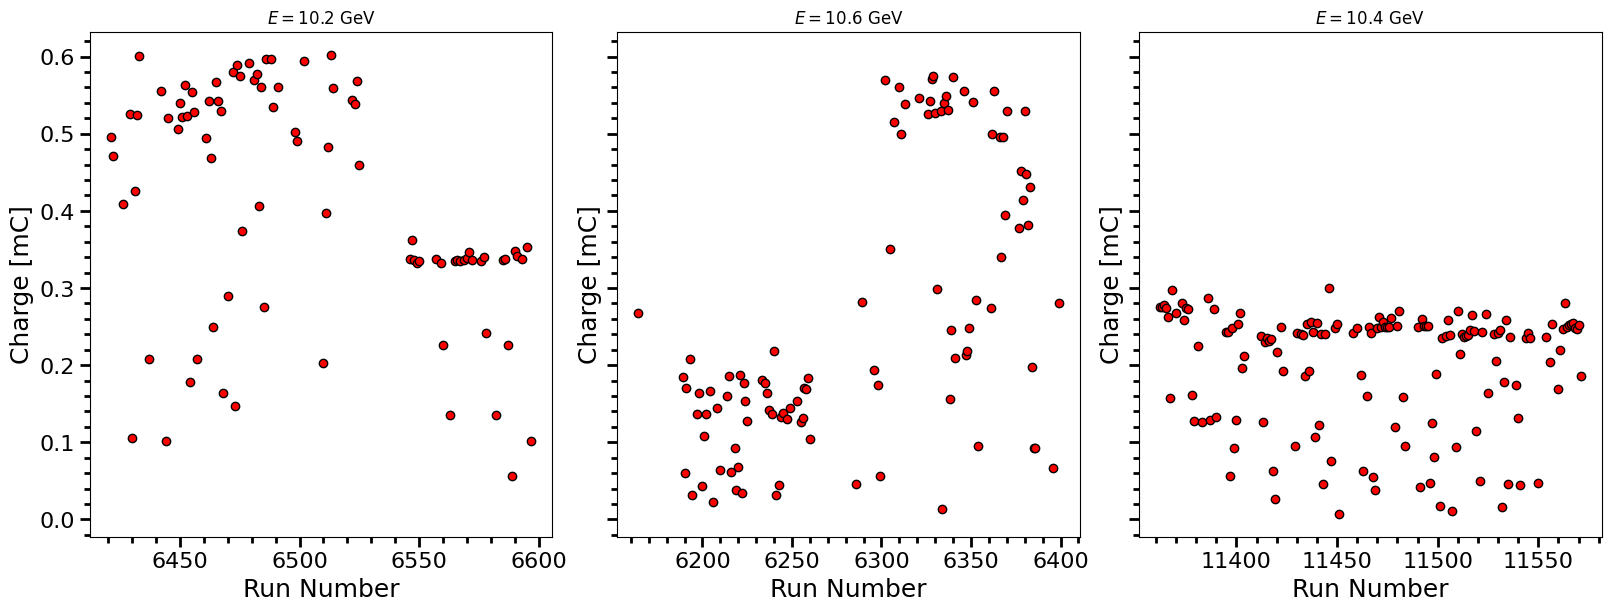

In [10]:
fig, axs = plt.subplots(1,3, figsize=(16,6), layout="constrained", sharey=True)

for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'Run Number', size = 18)
    ax.set_ylabel(r'Charge [mC]',size=18)

axs[0].set_title(r"$E = 10.2$ GeV")
axs[2].set_title(r"$E = 10.4$ GeV")
axs[1].set_title(r"$E = 10.6$ GeV")
axs[0].plot(ct_arr_2[0], ch_arr_2[1]*10**-6,linestyle=' ', marker='o', color='r', mec='k')
axs[2].plot(ct_arr_4[0], ch_arr_4[1]*10**-6, linestyle=' ', marker='o', color='r', mec='k')
axs[1].plot(ct_arr_6[0], ch_arr_6[1]*10**-6, linestyle=' ', marker='o', color='r', mec='k')

fig.savefig(f"/volatile/clas12/users/jphelan/SIDIS/analysis_note/run_data/acc_charge.pdf")

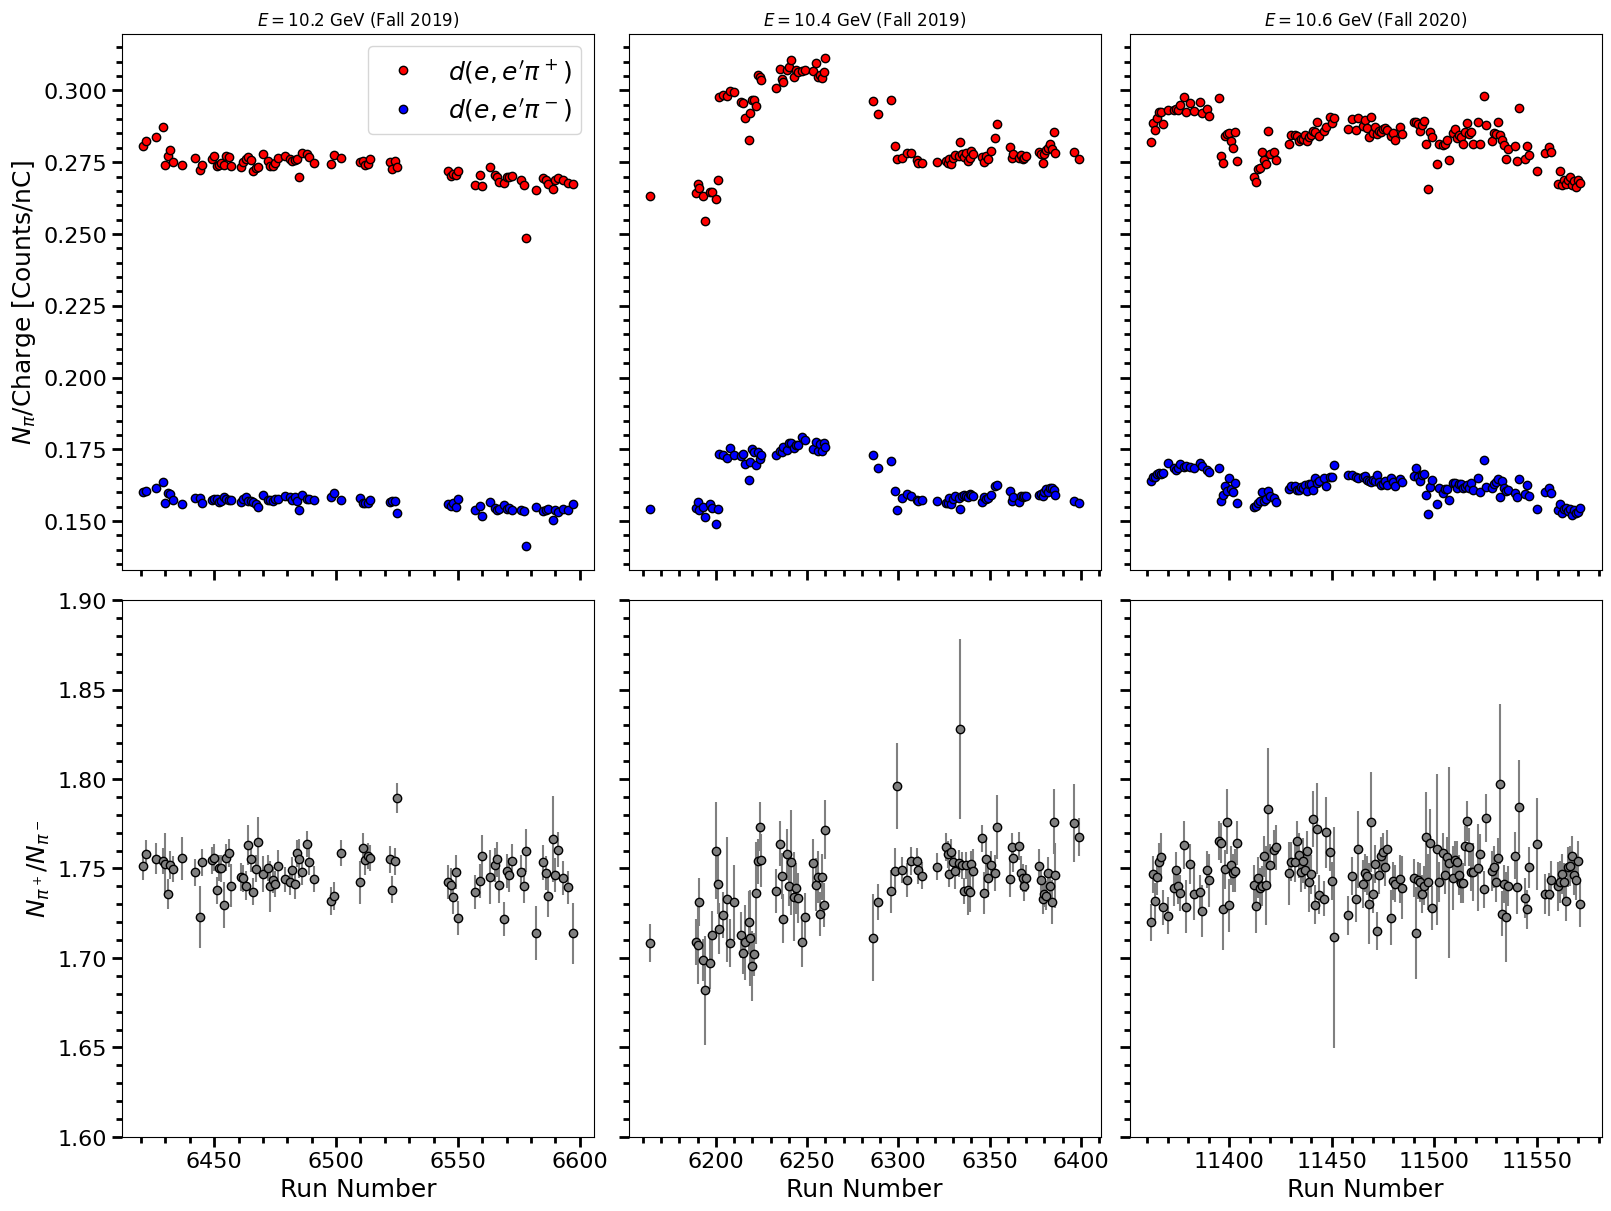

In [11]:
fig, axs = plt.subplots(2,3, figsize=(16,12), layout="constrained", sharex='col', sharey='row')

for ax in axs.flatten():
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'Run Number', size = 18)
    ax.label_outer(remove_inner_ticks=False)

axs[0, 0].set_ylabel(r'$N_{\pi}$/Charge [Counts/nC]',size=18)
axs[1, 0].set_ylabel(r'$N_{\pi^+}/N_{\pi^-}$',size=18)

axs[0,0].set_title(r"$E = 10.2$ GeV (Fall 2019)")
axs[0,1].set_title(r"$E = 10.4$ GeV (Fall 2019)")
axs[0,2].set_title(r"$E = 10.6$ GeV (Fall 2020)")

axs[0,0].plot(ct_arr_2[0], ct_arr_2[1]/(ch_arr_2[1]), linestyle=' ', marker='o', color='r', mec='k', label=r"$d(e, e'\pi^+)$")
axs[0,0].plot(ct_arr_2[0], ct_arr_2[2]/(ch_arr_2[1]), linestyle=' ', marker='o', color='b', mec='k', label=r"$d(e, e'\pi^-)$")

axs[0,1].plot(ct_arr_6[0], ct_arr_6[1]/(ch_arr_6[1]), linestyle=' ', marker='o', color='r', mec='k')
axs[0,1].plot(ct_arr_6[0], ct_arr_6[2]/(ch_arr_6[1]), linestyle=' ', marker='o', color='b', mec='k')

axs[0,2].plot(ct_arr_4[0], ct_arr_4[1]/(ch_arr_4[1]), linestyle=' ', marker='o', color='r', mec='k')
axs[0,2].plot(ct_arr_4[0], ct_arr_4[2]/(ch_arr_4[1]), linestyle=' ', marker='o', color='b', mec='k')
axs[0,0].legend(fontsize=18)

axs[1,0].errorbar(ct_arr_2[0], ct_arr_2[1]/(ct_arr_2[2]), ct_arr_2[1]/(ct_arr_2[2])*np.sqrt( 1/ct_arr_2[1] + 1/ct_arr_2[2] ),linestyle=' ', marker='o', color='grey', mec='k')

axs[1,1].errorbar(ct_arr_6[0], ct_arr_6[1]/(ct_arr_6[2]), ct_arr_6[1]/(ct_arr_6[2])*np.sqrt( 1/ct_arr_6[1] + 1/ct_arr_6[2] ), linestyle=' ', marker='o', color='grey', mec='k')

axs[1,2].errorbar(ct_arr_4[0], ct_arr_4[1]/(ct_arr_4[2]), ct_arr_4[1]/(ct_arr_4[2])*np.sqrt( 1/ct_arr_4[1] + 1/ct_arr_4[2] ), linestyle=' ', marker='o', color='grey', mec='k')

axs[1, 0].set_ylim(1.6, 1.9)

fig.savefig(f"/volatile/clas12/users/jphelan/SIDIS/analysis_note/run_data/pion_acc_charge.pdf")

In [113]:
df = pd.read_csv("../histograms/analysis_note/selection_plots_10.2.txt" ,sep='\t')
arr = np.asarray(df)
print(arr)
for i in range(len(arr)):
    print( arr[i][1]/arr[2][1] )

[['All tracks' 3462900000.0 1209220000.0]
 ['Event Builder' 918964000.0 457522000.0]
 ['Electron DC Fiducials' 1006740000.0 500298000.0]
 ['PCAL WV' 918964000.0 457522000.0]
 ['PCAL Edep' 571272000.0 279620000.0]
 ['SF Cuts' 570624000.0 279400000.0]
 ['SF Correlation' 560409000.0 275110000.0]
 ['Electron Vertex' 551304000.0 270185000.0]
 ['Pion DC Fiducials' 281871000.0 138161000.0]
 ['Pion Vertex' 186644000.0 75312100.0]
 ['Chi2' 162391000.0 64292700.0]
 ['All cuts' 138695000.0 57517200.0]]
3.4397163120567376
0.912811649482488
1.0
0.912811649482488
0.5674474044937123
0.5668037427737053
0.5566571309374814
0.5476130877883069
0.27998390845699983
0.18539444146452908
0.16130381230506388
0.13776645409937024
